<a href="https://colab.research.google.com/github/Sigerip/curso-data-viz/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Introdução ao Seaborn

## 4.1 Visualização com Seaborn

Seaborn é uma biblioteca de visualização de dados baseada no Matplotlib que foi desenvolvida por Michael Waskom. Ela foi projetada especificamente para visualização de dados estatísticos e oferece:

- Interface de alto nível para criar gráficos complexos com poucas linhas de código

- Temas e paletas de cores atraentes por padrão
    
- Integração perfeita com estruturas de dados do Pandas

- Funções específicas para visualizar relações entre variáveis
    
- Suporte para visualização de modelos estatísticos

In [62]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit

# Verificar a versão do Seaborn
print(f"Versão do Seaborn: {sns.__version__}")

Versão do Seaborn: 0.13.2


## 4.2 Estilos e Temas do Seaborn

Uma das vantagens do Seaborn é a melhoria estética imediata que ele traz para as visualizações.

Estilos de Plot:

- **darkgrid**: Grade escura com fundo branco
- **whitegrid**: Grade clara com fundo branco
- **dark**: Fundo escuro sem grade
- **white**: Fundo branco sem grade
- **ticks**: Apenas com marcadores de eixo

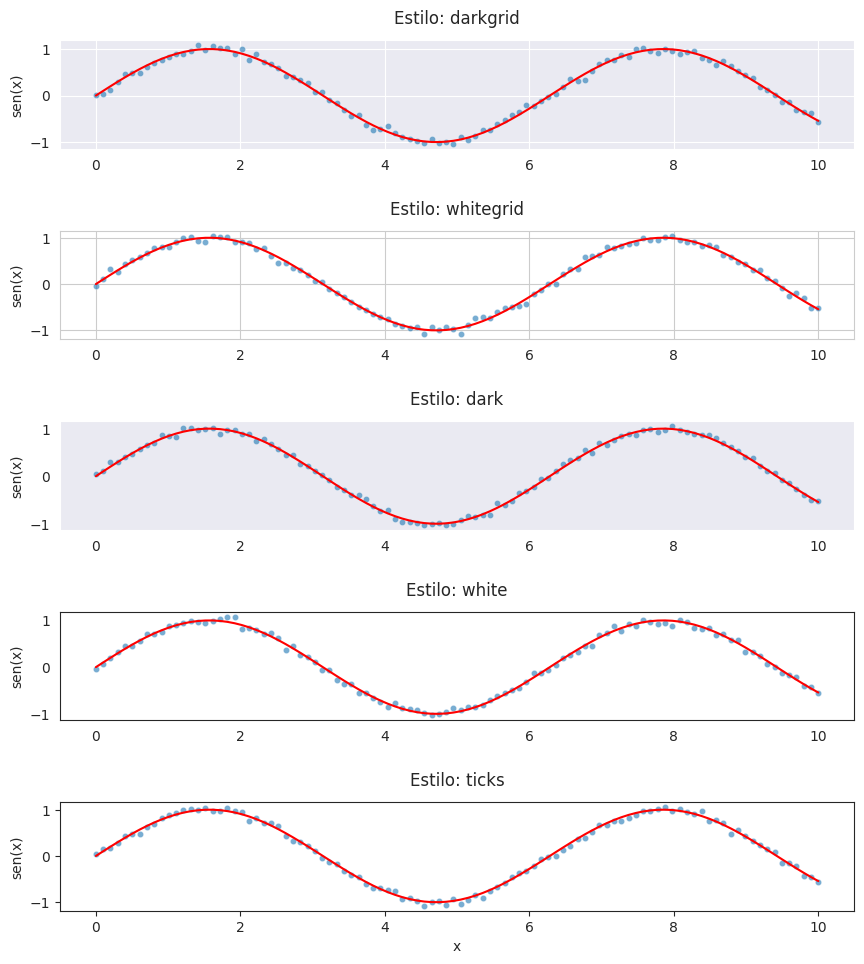

In [2]:
# Demonstração dos estilos do Seaborn
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

# Cria figura com proporções
fig = plt.figure(figsize=(9, 10))

for i, style in enumerate(styles, 1):
    with sns.axes_style(style):  # Aplica o estilo ANTES de criar o subplot
        ax = fig.add_subplot(len(styles), 1, i)
        x = np.linspace(0, 10, 100)
        y = np.sin(x) + np.random.normal(0, 0.05, 100)  # Adiciona ruído para visualização

        # Plot com elementos estilizados
        sns.scatterplot(x=x, y=y, s=20, alpha=0.6, ax=ax)
        sns.lineplot(x=x, y=np.sin(x), color='red', linewidth=1.5, ax=ax)

        # Títulos e labels
        ax.set_title(f"Estilo: {style}", fontsize=12, pad=12)
        if i == len(styles):
            ax.set_xlabel("x", fontsize=10)
        else:
            ax.set_xlabel("")
        ax.set_ylabel("sen(x)", fontsize=10)

plt.tight_layout(pad=2.0)  # Aumenta o espaçamento entre subplots
plt.show() # Exibe o gráfico

Contextos de Escala

Estes contextos controlam o tamanho dos elementos do gráfico:

- **paper**: Menor escala, ideal para documentos acadêmicos
- **notebook**: Tamanho médio, bom para notebooks Jupyter
- **talk**: Escala maior, ótimo para apresentações
- **poster**: Maior escala, ideal para pôsteres

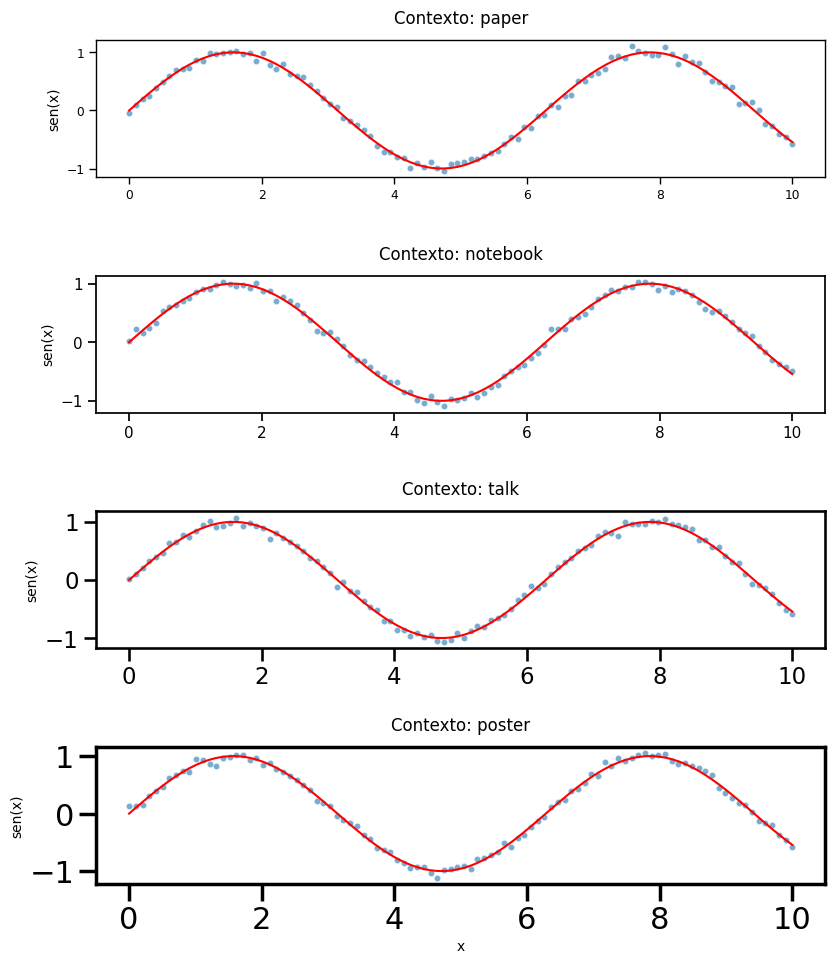

In [3]:
# Demonstração dos contextos do Seaborn
contexts = ['paper', 'notebook', 'talk', 'poster']

# Cria figura com proporções
fig = plt.figure(figsize=(9, 10))

for i, context in enumerate(contexts, 1):
    with sns.plotting_context(context):  # Aplica o contexto ANTES de criar o subplot
        ax = fig.add_subplot(len(contexts), 1, i)
        x = np.linspace(0, 10, 100)
        y = np.sin(x) + np.random.normal(0, 0.05, 100)  # Adiciona ruído para visualização

        # Plot com elementos estilizados
        sns.scatterplot(x=x, y=y, s=20, alpha=0.6, ax=ax)
        sns.lineplot(x=x, y=np.sin(x), color='red', linewidth=1.5, ax=ax)

        # Títulos e labels
        ax.set_title(f"Contexto: {context}", fontsize=12, pad=12)
        if i == len(contexts):
            ax.set_xlabel("x", fontsize=10)
        else:
            ax.set_xlabel("")
        ax.set_ylabel("sen(x)", fontsize=10)

plt.tight_layout(pad=2.0)  # Aumenta o espaçamento entre subplots
plt.show() # Exibe o gráfico

Cores Padrão

O Seaborn vem com uma paleta padrão de 10 cores:

- **Azul** (#1f77b4)
- **Laranja** (#ff7f0e)
- **Verde** (#2ca02c)
- **Vermelho** (#d62728)
- **Roxo** (#9467bd)
- **Marrom** (#8c564b)
- **Rosa** (#e377c2)
- **Cinza** (#7f7f7f)
- **Verde-amarelado** (#bcbd22)
- **Azul claro** (#17becf)



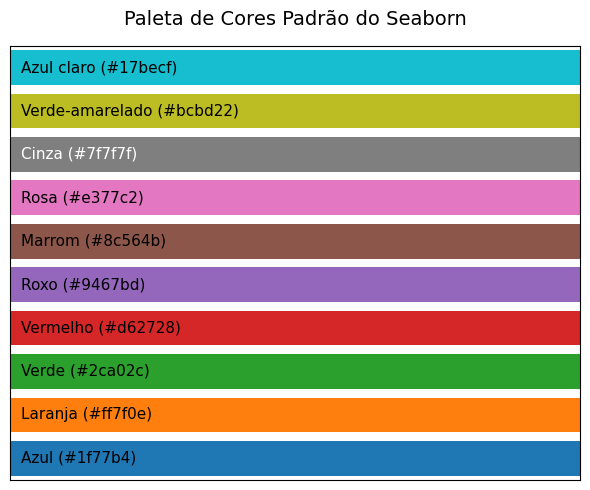

In [4]:
# Lista de cores e nomes
cores = [
    ("Azul", "#1f77b4"),
    ("Laranja", "#ff7f0e"),
    ("Verde", "#2ca02c"),
    ("Vermelho", "#d62728"),
    ("Roxo", "#9467bd"),
    ("Marrom", "#8c564b"),
    ("Rosa", "#e377c2"),
    ("Cinza", "#7f7f7f"),
    ("Verde-amarelado", "#bcbd22"),
    ("Azul claro", "#17becf"),
]

fig, ax = plt.subplots(figsize=(6, 5))

# Desenha um retângulo colorido para cada cor
for i, (nome, cor) in enumerate(cores):
    ax.barh(i, 1, color=cor)
    ax.text(0.02, i, f"{nome} ({cor})", va='center', ha='left', fontsize=11, color='black' if i != 7 else 'white')

ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(cores) - 0.5)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Paleta de Cores Padrão do Seaborn", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

Além disso, o Seaborn também oferece várias outras paletas de cores predefinidas e a possibilidade de criar paletas personalizadas usando ```sns.color_palette()```.

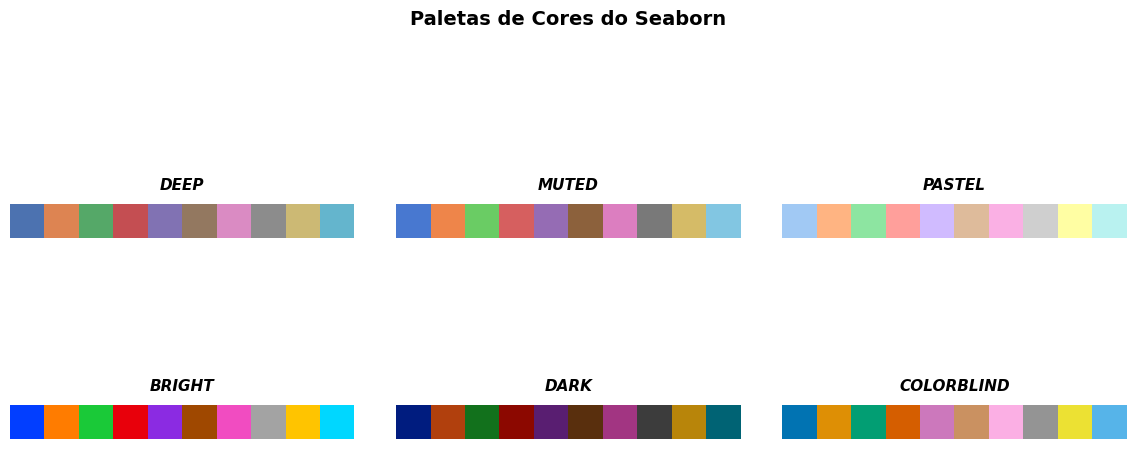

In [5]:
# Paletas de cores
plt.figure(figsize=(12, 6))
paletas = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

for i, palette in enumerate(paletas, 1):
    ax = plt.subplot(2, 3, i)

    # Cria uma matriz de índices para representar as cores
    cores = sns.color_palette(palette, n_colors=10)
    gradiente = np.arange(10).reshape(1, -1)  # Matriz 1x10 de índices

    # Plot usando os índices com a paleta como cmap
    sns.heatmap(
        gradiente,
        cmap=sns.color_palette(palette, as_cmap=True),
        ax=ax,
        cbar=False,
        square=True,
        xticklabels=False,
        yticklabels=False
    )

    # Estilização
    ax.set_title(palette.upper(), fontsize=11, pad=10, fontweight='bold', style='italic')
    ax.set_facecolor('white')  # Fundo branco para contraste

plt.tight_layout(pad=3.0)
plt.suptitle("Paletas de Cores do Seaborn", y=1.02, fontsize=14, fontweight='bold')
plt.show()

## 4.3 Tipos de Gráficos no Seaborn

Seaborn oferece uma variedade de funções para criar diferentes tipos de gráficos. Vamos explorar os principais:

### 4.3.1 Gráficos de Distribuição

Esses gráficos são usados para visualizar a distribuição de uma única variável ou a relação entre várias variáveis.

- ```sns.histplot()```: Cria histogramas, que mostram a frequência de ocorrência de diferentes valores em um conjunto de dados.
- ```sns.kdeplot()```: Cria gráficos de densidade kernel (KDE), que estimam a função de densidade de probabilidade de uma variável contínua.
- ```sns.displot()```: Uma função mais geral que combina histogramas e KDEs, permitindo criar gráficos de distribuição mais complexos.
- ```sns.rugplot()```: Adiciona pequenas linhas (rugs) ao longo do eixo x para mostrar a localização exata de cada observação.
- ```sns.ecdfplot()```: Cria um gráfico ECDF (Empirical Cumulative Distribution Function) que mostra a proporção de observações em um conjunto de dados que são menores ou iguais a um determinado valor. Ele é usado para visualizar a distribuição cumulativa de uma única variável.

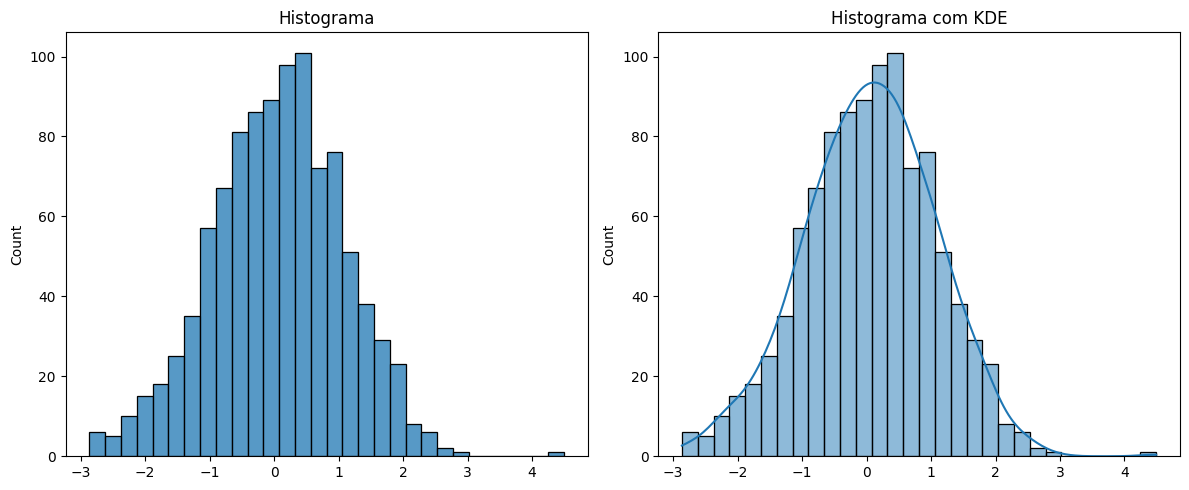

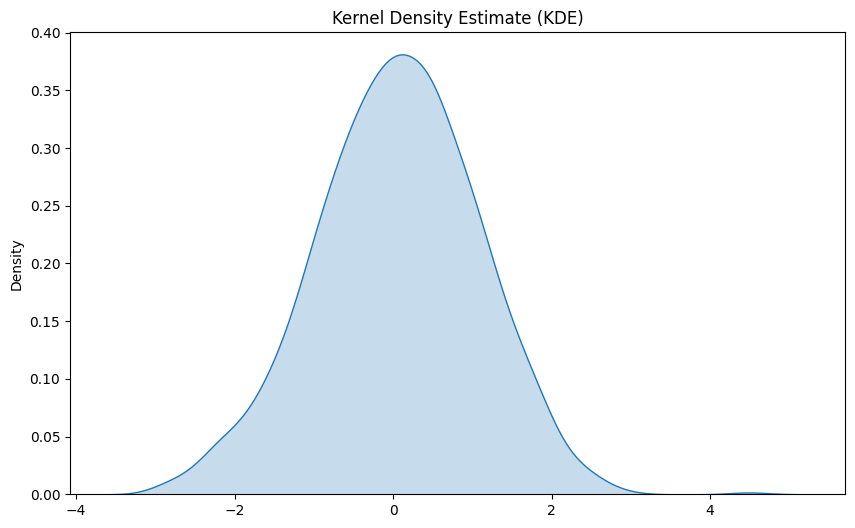

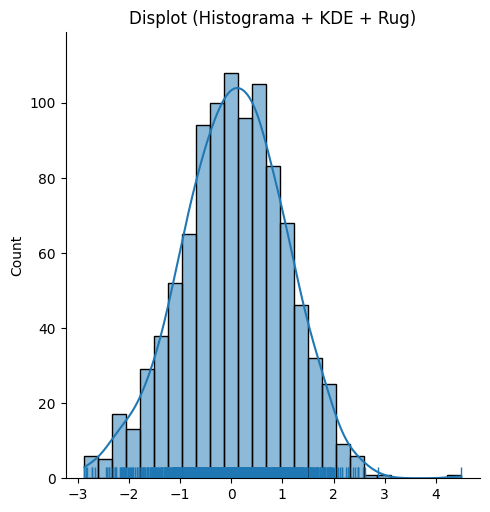

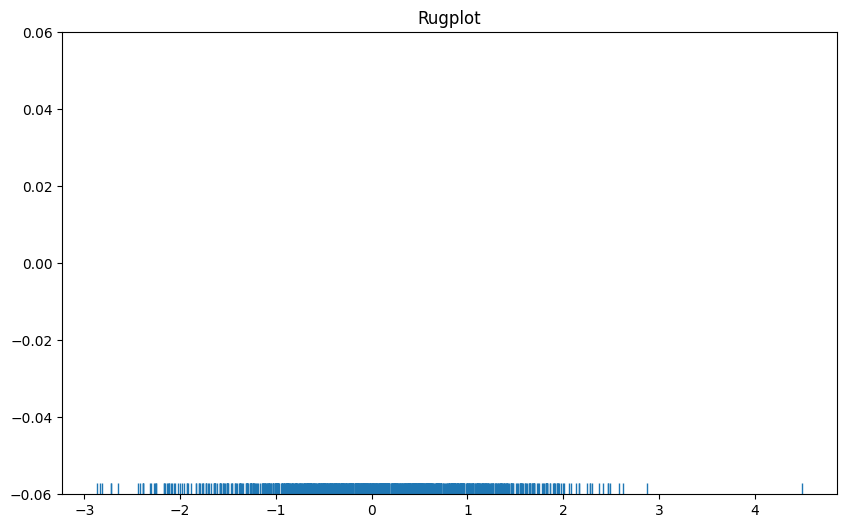

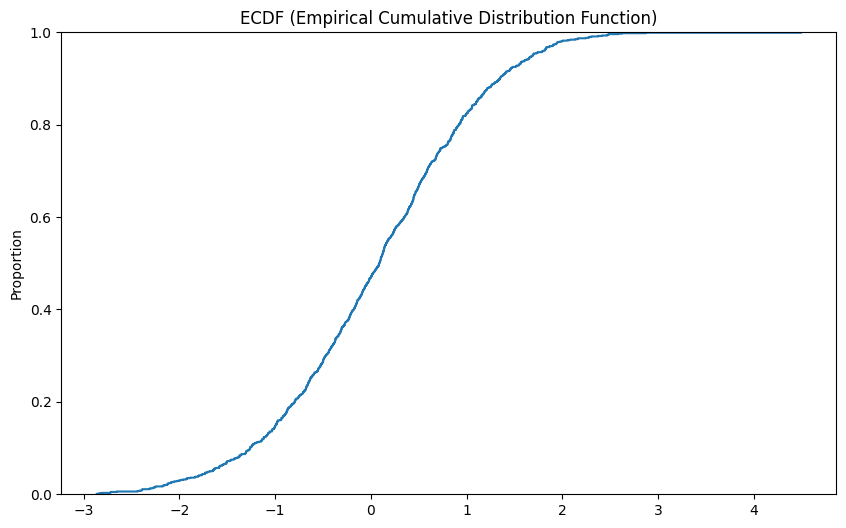

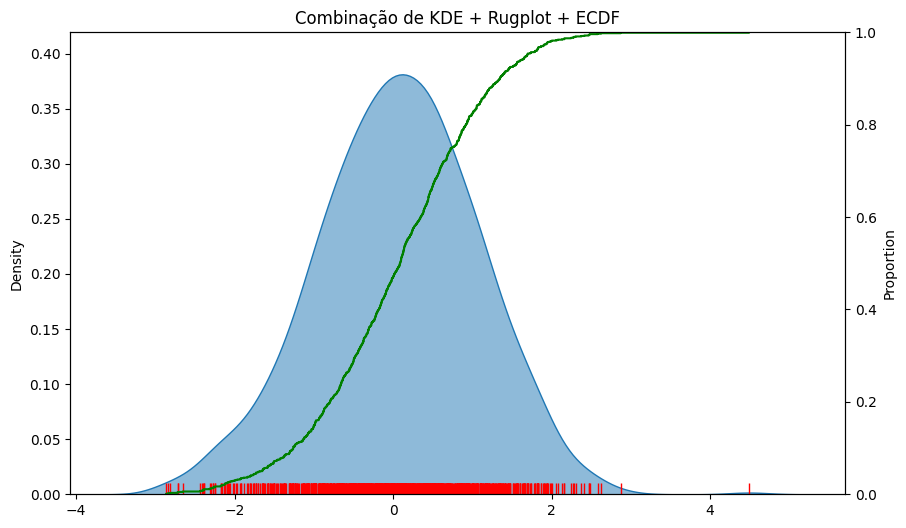

In [6]:
# Gerar dados aleatórios com distribuição normal
data = np.random.normal(0, 1, 1000)

# Figura 1: Histogramas (com e sem KDE)
plt.figure(figsize=(12, 5))

# Subplot 1: Histograma simples
plt.subplot(1, 2, 1)
sns.histplot(data, kde=False, bins=30)  # kde=False remove a linha de densidade
plt.title('Histograma')

# Subplot 2: Histograma com KDE
plt.subplot(1, 2, 2)
sns.histplot(data, kde=True, bins=30)  # kde=True adiciona a linha de densidade
plt.title('Histograma com KDE')

plt.tight_layout()
plt.show()

# Figura 2: Apenas KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data, fill=True)  # fill=True preenche a área sob a curva
plt.title('Kernel Density Estimate (KDE)')
plt.show()

# Figura 3: Displot (função mais flexível para distribuições)
sns.displot(
    data=data,
    kind="hist",  # pode ser "kde", "ecdf" ou "hist"
    kde=True,     # adiciona linha KDE ao histograma
    rug=True      # adiciona rugplot
)
plt.title('Displot (Histograma + KDE + Rug)')
plt.show()

# Figura 4: Rugplot
plt.figure(figsize=(10, 6))
sns.rugplot(data)  # adiciona marcas no eixo x para cada observação
plt.title('Rugplot')
plt.show()

# Figura 5: ECDF (Empirical Cumulative Distribution Function)
plt.figure(figsize=(10, 6))
sns.ecdfplot(data)  # mostra a distribuição cumulativa
plt.title('ECDF (Empirical Cumulative Distribution Function)')
plt.show()

# Figura 6: Combinação de diferentes visualizações
plt.figure(figsize=(10, 6))
# Plotar KDE
sns.kdeplot(data, fill=True, alpha=0.5, label='KDE')
# Adicionar rugplot
sns.rugplot(data, color='red', label='Rugplot')
# Adicionar ECDF (eixo y secundário)
ax2 = plt.twinx()
sns.ecdfplot(data, ax=ax2, color='green', label='ECDF')
plt.title('Combinação de KDE + Rugplot + ECDF')
plt.show()

### 4.3.2 Gráficos de Relação

Esses gráficos são usados para visualizar a relação entre duas ou mais variáveis.

- ```sns.scatterplot()```: Cria gráficos de dispersão, que mostram a relação entre duas variáveis como pontos em um plano cartesiano.
- ```sns.lineplot()```: Cria gráficos de linha, que mostram a relação entre duas variáveis como uma linha conectando os pontos de dados.
- ```sns.relplot()```: Uma função mais geral que combina gráficos de dispersão e linha, permitindo criar gráficos de relação mais complexos.

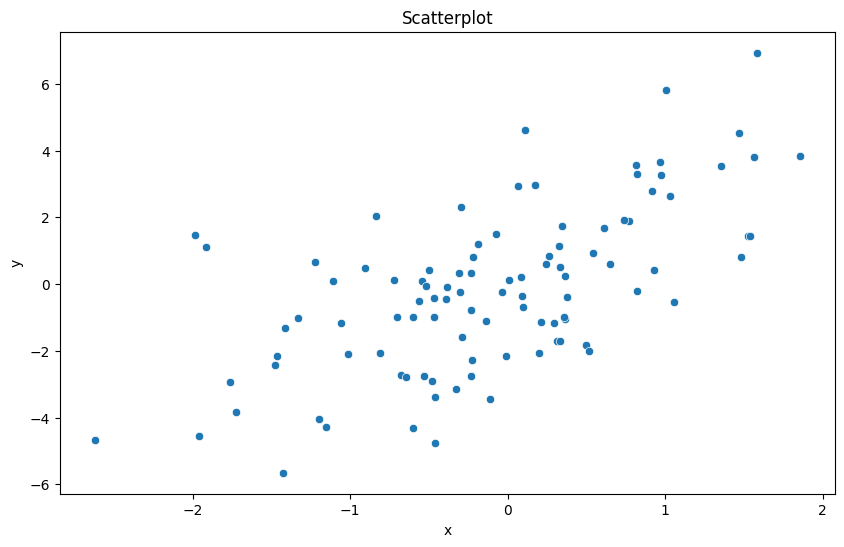

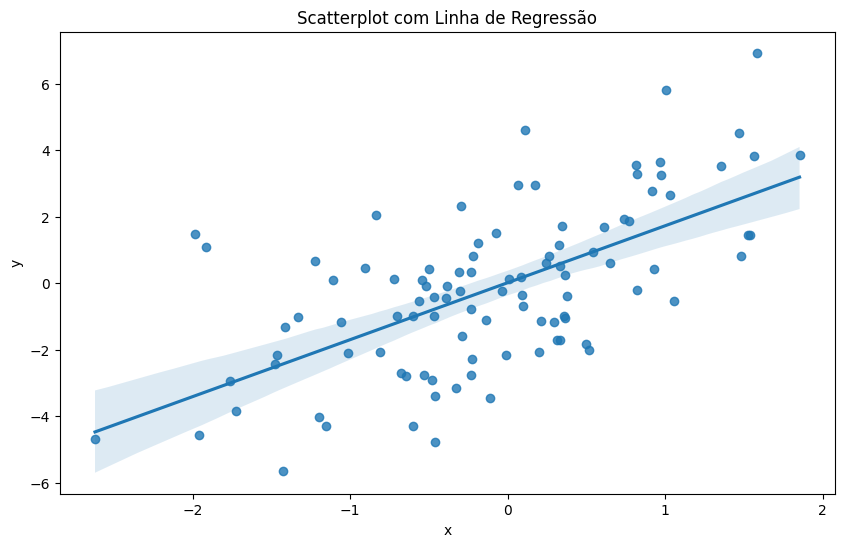

In [7]:
# Gerar dados
np.random.seed(42)
n = 100
x = np.random.normal(0, 1, n)
y = x * 2 + np.random.normal(0, 2, n)
df = pd.DataFrame({'x': x, 'y': y})

# Scatterplot simples
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df)
plt.title('Scatterplot')
plt.show()

# Scatterplot com regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='x', y='y', data=df)
plt.title('Scatterplot com Linha de Regressão')
plt.show()

### 4.3.3 Gráficos Categóricos

Esses gráficos são usados para visualizar a relação entre uma variável categórica e uma ou mais variáveis numéricas.

- ```sns.barplot()```: Cria gráficos de barras, que mostram a média de uma variável numérica para cada categoria.
- ```sns.countplot()```: Cria gráficos de contagem, que mostram o número de ocorrências de cada categoria.
- ```sns.boxplot()```: Cria diagramas de caixa, que mostram a distribuição de uma variável numérica para cada categoria, incluindo a mediana, os quartis e os outliers.
- ```sns.violinplot()```: Cria gráficos de violino, que combinam diagramas de caixa e KDEs para mostrar a distribuição de uma variável numérica para cada categoria.
- ```sns.stripplot()```: Cria gráficos de dispersão, que mostram a distribuição de uma variável numérica para cada categoria, com os pontos de dados espalhados ao longo do eixo x.
- ```sns.swarmplot()```: Similar ao stripplot(), mas com os pontos de dados ajustados para evitar sobreposição.
- ```sns.catplot()```: Uma função mais geral que combina todos os gráficos categóricos, permitindo criar gráficos mais complexos.
- ```sns.pointplot()```: Cria um gráfico para mostrar a relação entre uma variável categórica e uma variável numérica. Ele exibe a média da variável numérica para cada categoria, com intervalos de confiança ao redor dessas médias. Ele é especialmente útil para comparar a média de uma variável entre diferentes categorias.

In [10]:
# Dados de exemplo
titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


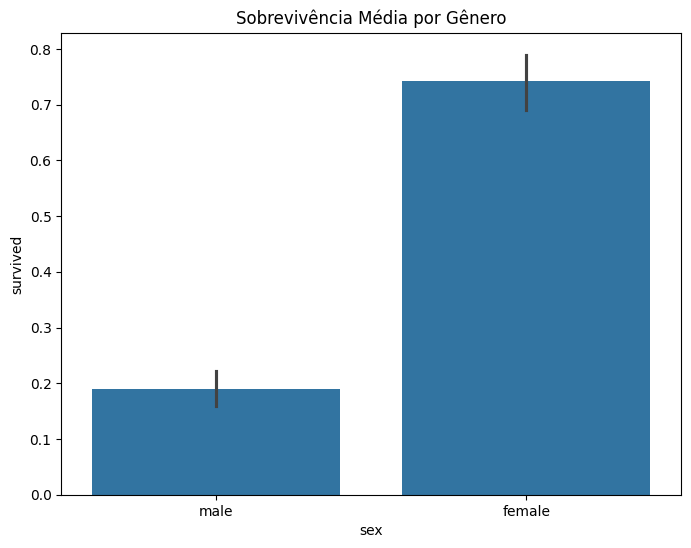

In [11]:
# 1. Barplot: Sobrevivência média por gênero
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Sobrevivência Média por Gênero')
plt.show()

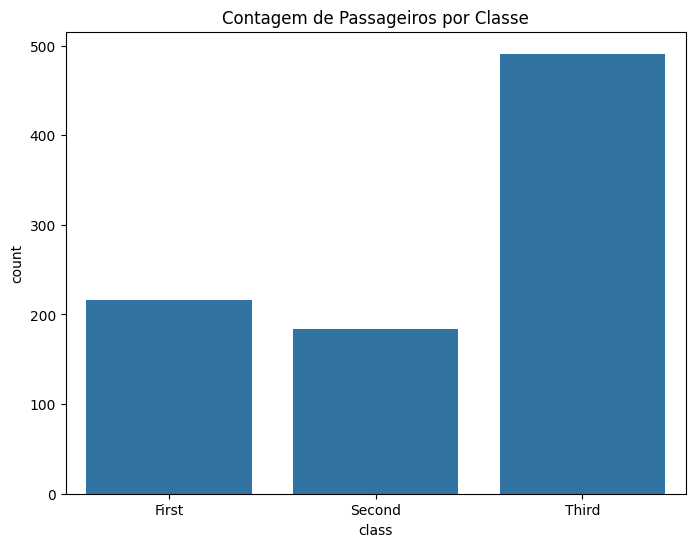

In [12]:
# 2. Countplot: Contagem de passageiros por classe
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=titanic)
plt.title('Contagem de Passageiros por Classe')
plt.show()

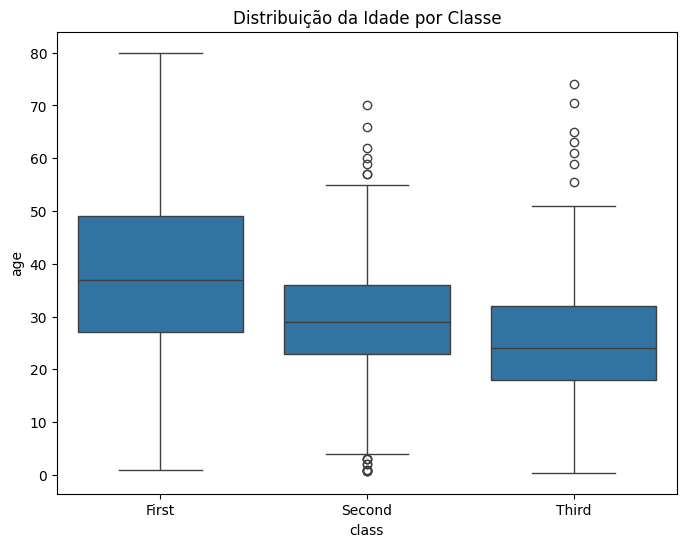

In [13]:
# 3. Boxplot: Distribuição da idade por classe
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='age', data=titanic)
plt.title('Distribuição da Idade por Classe')
plt.show()

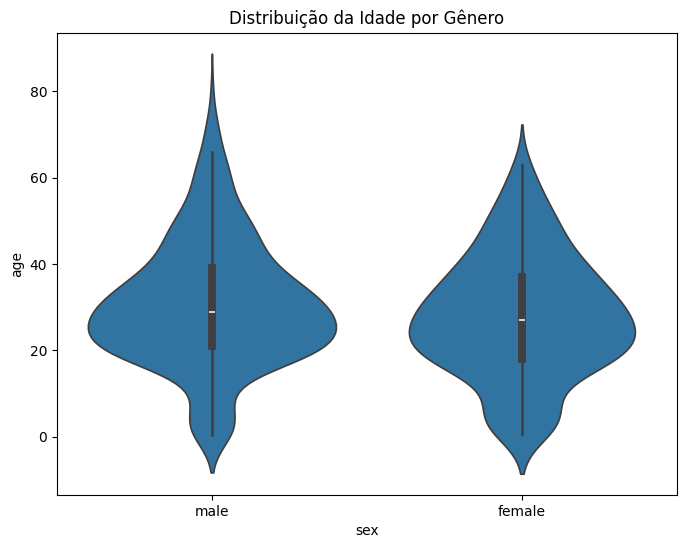

In [14]:
# 4. Violinplot: Distribuição da idade por gênero
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='age', data=titanic)
plt.title('Distribuição da Idade por Gênero')
plt.show()

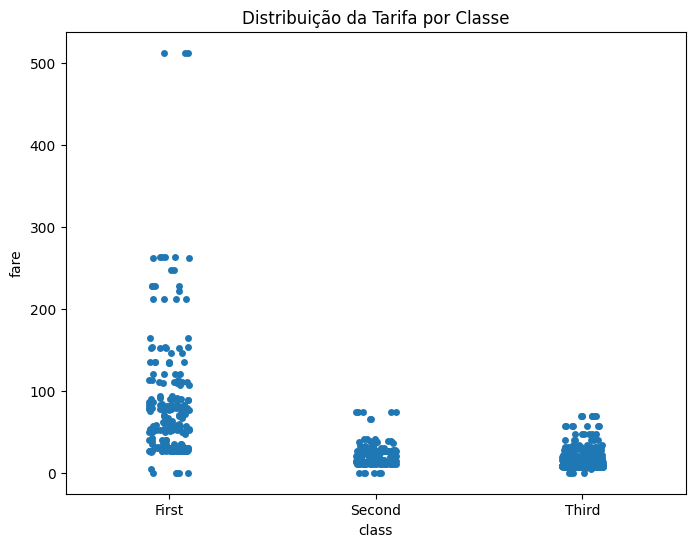

In [15]:
# 5. Stripplot: Distribuição da tarifa por classe
plt.figure(figsize=(8, 6))
sns.stripplot(x='class', y='fare', data=titanic)
plt.title('Distribuição da Tarifa por Classe')
plt.show()

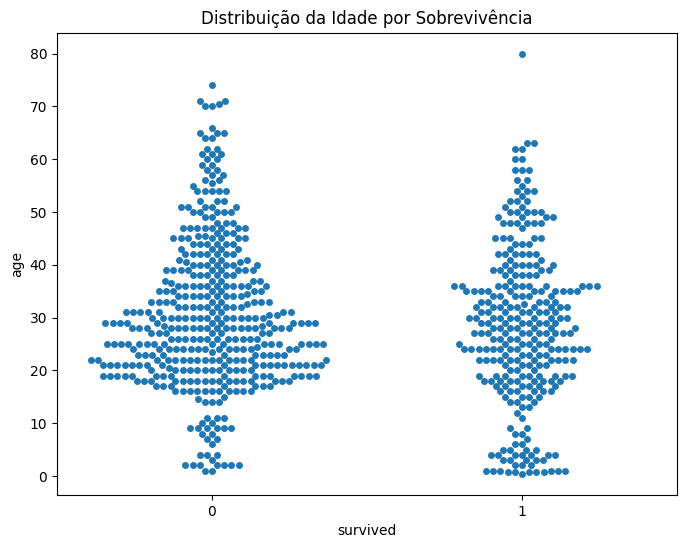

In [16]:
# 6. Swarmplot: Distribuição da idade por sobrevivência
plt.figure(figsize=(8, 6))
sns.swarmplot(x='survived', y='age', data=titanic)
plt.title('Distribuição da Idade por Sobrevivência')
plt.show()

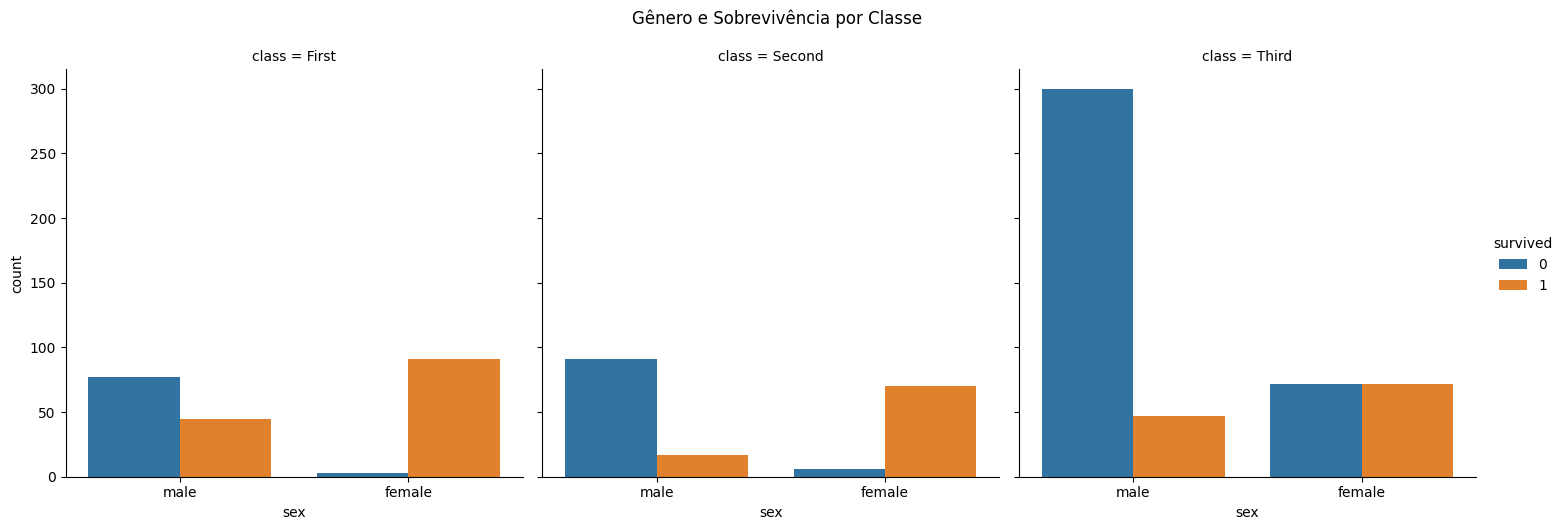

In [17]:
# 7. Catplot: Combinação de gênero e sobrevivência por classe
sns.catplot(x='sex', col='class', hue='survived', data=titanic, kind='count')
plt.suptitle('Gênero e Sobrevivência por Classe', y=1.05)
plt.show()

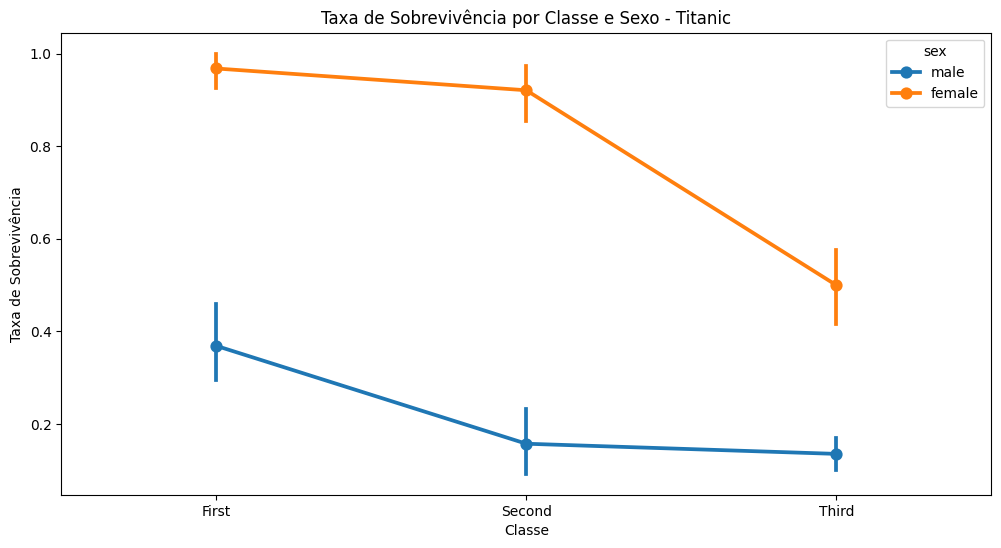

In [18]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='class', y='survived', hue='sex', data=titanic)
plt.title('Taxa de Sobrevivência por Classe e Sexo - Titanic')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Classe')
plt.show()

### 4.3.4 Gráficos de Regressão

Os gráficos de regressão no Seaborn são usados para visualizar a relação entre variáveis, com foco em ajustar e exibir modelos de regressão. Eles são úteis para entender como uma variável dependente muda em relação a uma ou mais variáveis independentes.

- ```sns.regplot()```: Cria um gráfico de dispersão com uma linha de regressão ajustada aos dados. Ele mostra a relação entre duas variáveis, juntamente com um intervalo de confiança para a linha de regressão.
- ```sns.lmplot()```: Combina ```regplot()``` com a capacidade de adicionar mais variáveis categóricas através dos parâmetros ```hue```, ```col``` e ```row```. Isso permite visualizar a relação entre duas variáveis para diferentes subgrupos de dados.
- ```sns.residplot()```: Plota os resíduos (erros) de um modelo de regressão em relação aos valores da variável preditora (independente).

In [19]:
# Dados de exemplo
tips = sns.load_dataset('tips')

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


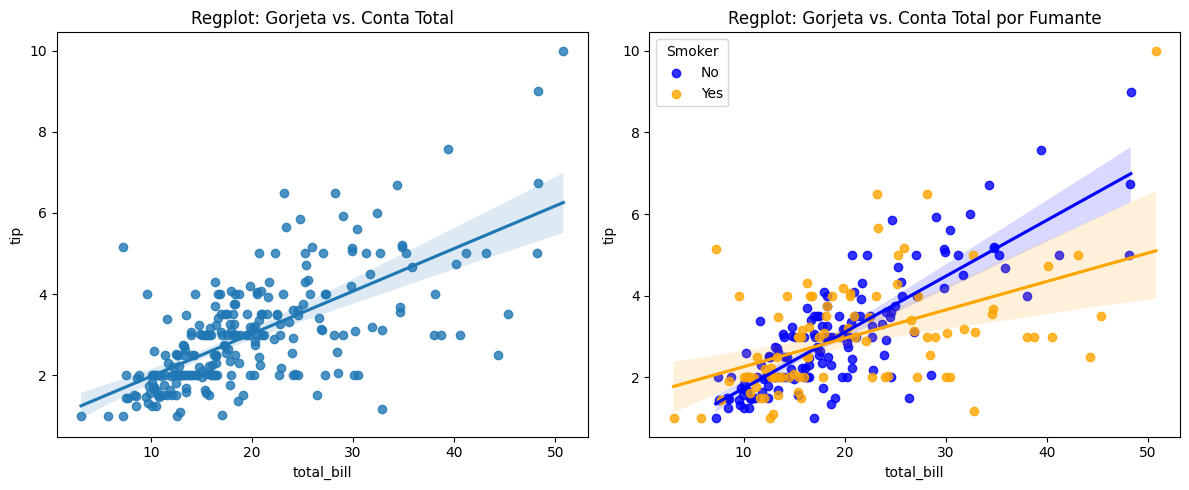

In [20]:
# Regplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title('Regplot: Gorjeta vs. Conta Total')

# Segundo subplot (Regplot com hue manual)
plt.subplot(1, 2, 2)

# Lista de categorias para 'smoker'
hue_groups = tips['smoker'].unique()
colors = ['blue', 'orange']  # Cores para 'No' e 'Yes'

# Plota regressão para cada categoria
for i, group in enumerate(hue_groups):
    subset = tips[tips['smoker'] == group]
    sns.regplot(
        x='total_bill',
        y='tip',
        data=subset,
        color=colors[i],
        label=group
    )

plt.title('Regplot: Gorjeta vs. Conta Total por Fumante')
plt.legend(title='Smoker')

plt.tight_layout()
plt.show()

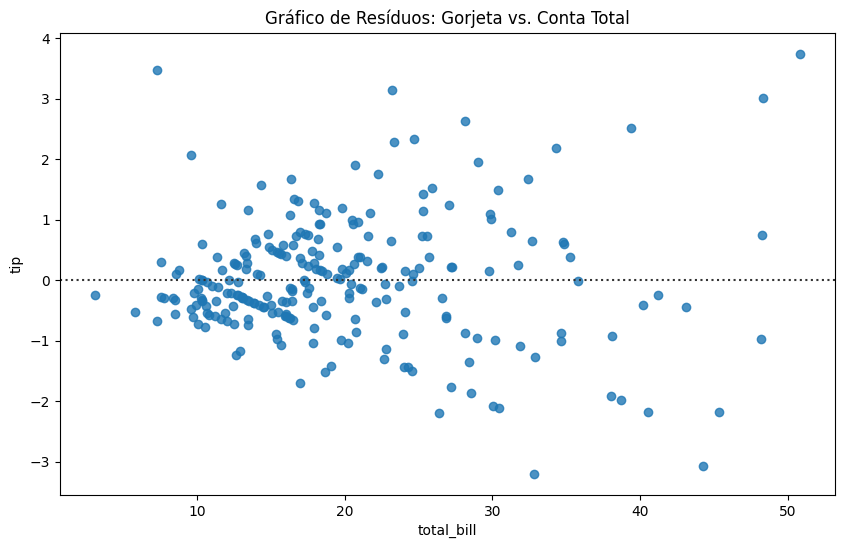

In [21]:
# Resíduos do modelo
plt.figure(figsize=(10, 6))
sns.residplot(x='total_bill', y='tip', data=tips)
plt.title('Gráfico de Resíduos: Gorjeta vs. Conta Total')
plt.show()

**O Paradoxo de Simpson: Uma Explicação**

O Paradoxo de Simpson é um fenômeno estatístico em que uma tendência aparece em diferentes grupos de dados, mas desaparece ou se inverte quando esses grupos são combinados. Em outras palavras, uma relação observada em subgrupos de uma população pode ser diferente ou oposta à relação observada na população inteira.

Como ele ocorre?

O paradoxo geralmente ocorre quando há uma variável de confusão (ou variável latente) que não está sendo considerada na análise inicial. Essa variável de confusão afeta tanto a variável independente quanto a variável dependente, criando uma correlação espúria entre elas nos subgrupos. Quando os subgrupos são combinados, o efeito da variável de confusão pode obscurecer ou inverter a relação original.

Exemplo Clássico:

Um exemplo comum é o de um estudo sobre a eficácia de um tratamento médico. Suponha que o tratamento pareça ser menos eficaz para todos os pacientes quando os dados são agregados. No entanto, ao analisar os dados separadamente para homens e mulheres, o tratamento se mostra eficaz para ambos os grupos. Isso pode acontecer se as mulheres, em geral, tiverem uma taxa de recuperação menor e também serem mais propensas a receber o tratamento.

Importância:

O Paradoxo de Simpson destaca a importância de considerar todas as variáveis relevantes e analisar os dados em diferentes níveis de agregação para evitar conclusões enganosas.

In [91]:
# Gerar dados de exemplo para grupo abaixo de 50 anos
n_amostras = 100
np.random.seed(42)
idades = np.random.randint(20, 50, n_amostras)
horas = np.maximum(0, np.random.randint(1, 5, n_amostras) + np.random.randn(n_amostras))
horas = np.round(horas, 1)
p = 10 + 0.4 * idades - 2.0 * horas + np.random.randn(n_amostras) * 2
p = np.clip(np.round(p, 2), 0, 100)
abaixo_50 = pd.DataFrame({'idade': idades, 'horas_exercicio': horas, 'probabilidade': p})
abaixo_50['grupo'] = 'Abaixo de 50'

# Gerar dados de exemplo para grupo acima de 50 anos
n_amostras = 100
idades = np.random.randint(50, 85, n_amostras)
horas = np.maximum(0, np.random.randint(3, 8, n_amostras) + np.random.randn(n_amostras) * 0.5)
horas = np.round(horas, 1)
p = 30 + 0.3 * idades - 2.8 * horas + np.random.randn(n_amostras) * 2
p = np.clip(np.round(p, 2), 0, 100)
acima_50 = pd.DataFrame({'idade': idades, 'horas_exercicio': horas, 'probabilidade': p})
acima_50['grupo'] = 'Acima de 50'

# Combinar os dados
combinado = pd.concat([abaixo_50, acima_50], axis=0)

combinado

,idade,horas_exercicio,probabilidade,grupo
0,26,3.8,11.87,Abaixo de 50
1,39,2.6,18.18,Abaixo de 50
2,48,4.3,22.33,Abaixo de 50
3,34,1.0,23.52,Abaixo de 50
4,30,1.6,19.64,Abaixo de 50
...,...,...,...,...
95,56,3.6,37.39,Acima de 50
96,74,3.8,43.64,Acima de 50
97,53,5.3,30.04,Acima de 50
98,55,4.5,33.36,Acima de 50


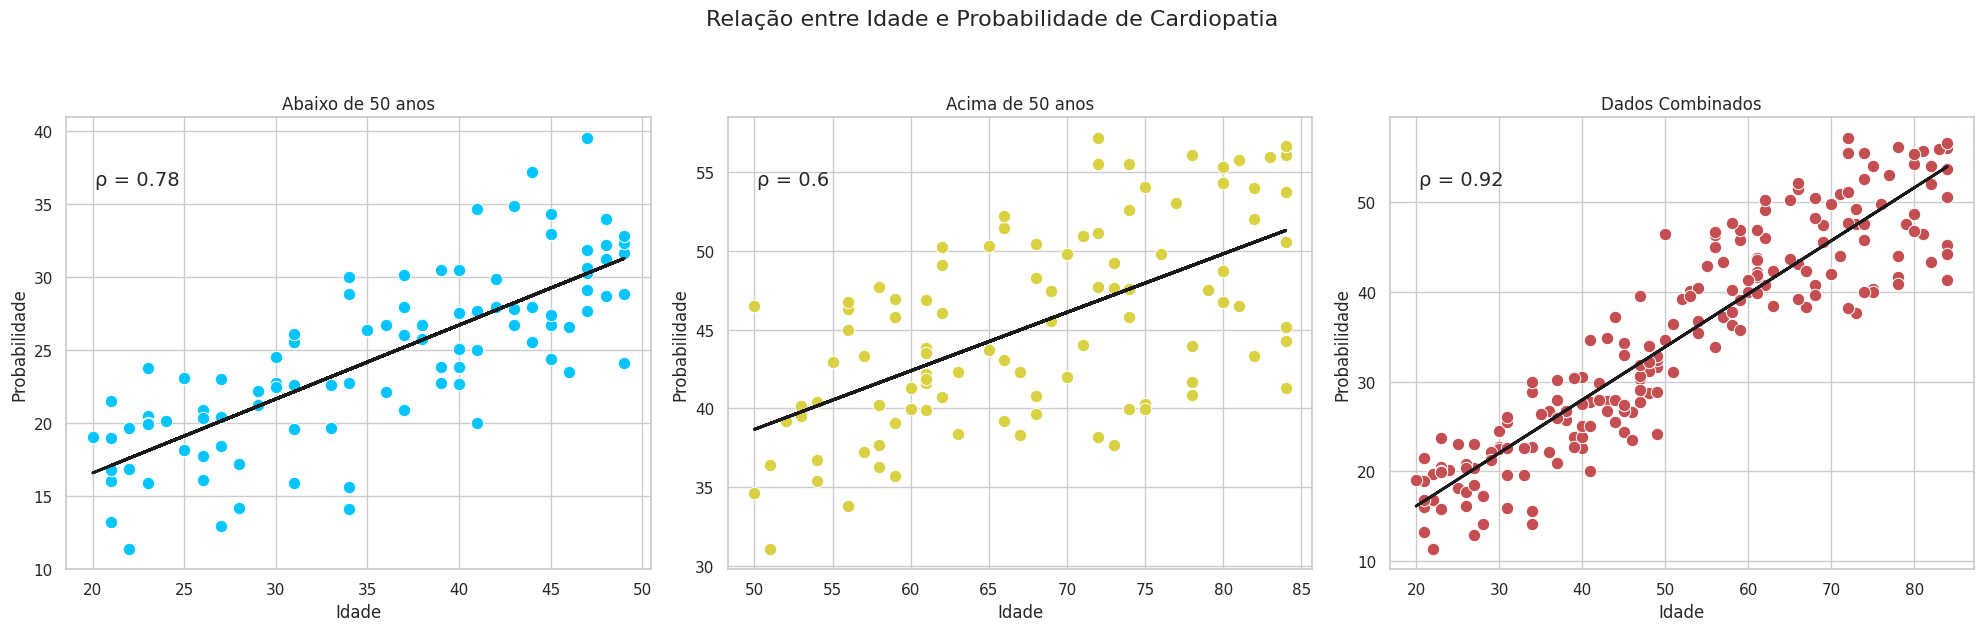

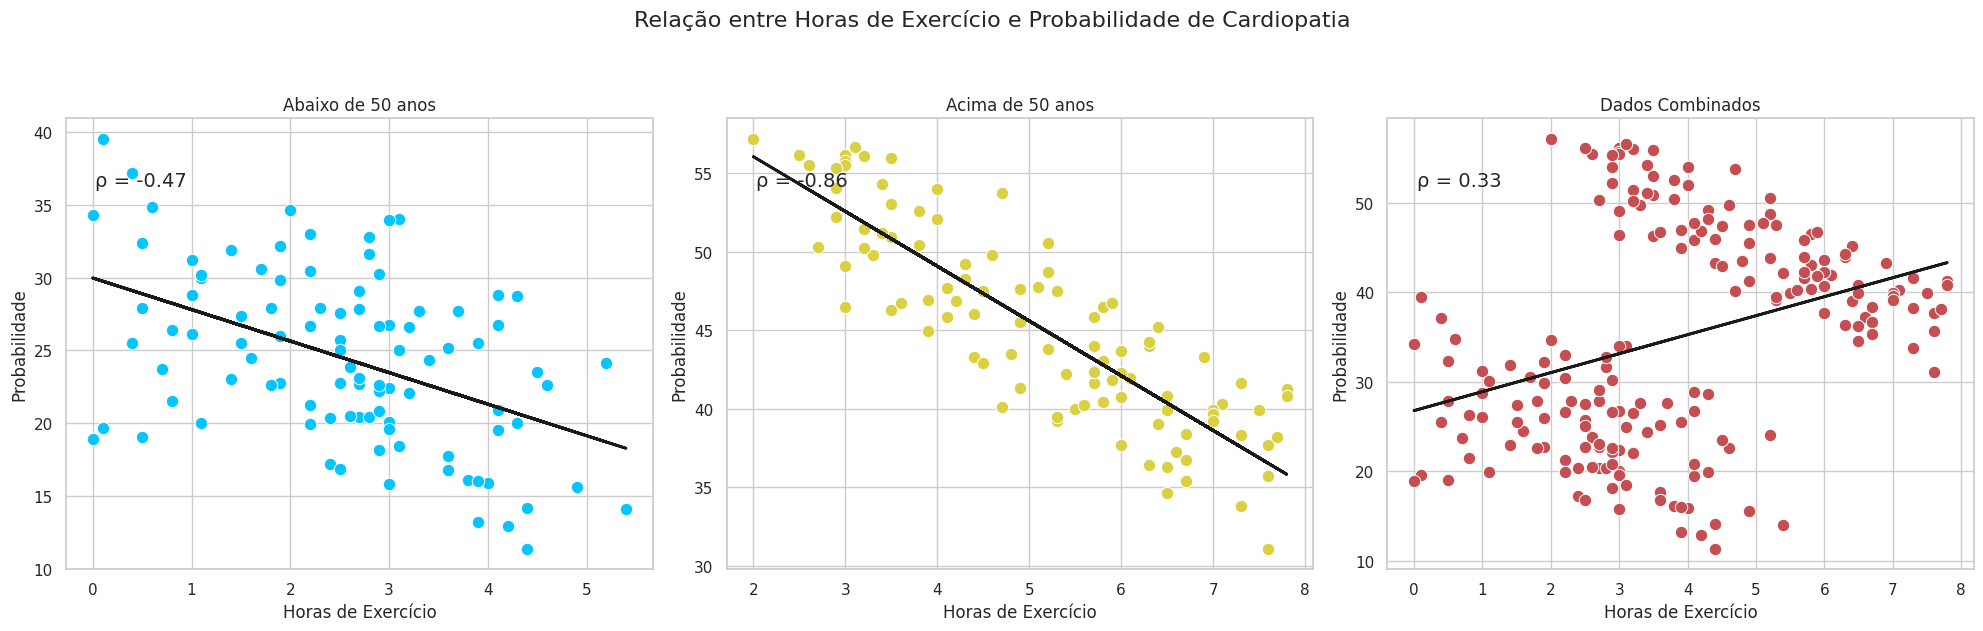

In [90]:
# Função para plotar relação com ajuste linear e coeficiente de correlação
def plotar_relacao(dados, coluna_x, cor, ax, titulo):
    """Plotar gráfico de dispersão com ajuste linear"""
    x, y = np.array(dados[coluna_x]), np.array(dados['probabilidade'])

    # Ajuste linear
    b, m = polyfit(x, y, 1)

    # Plotar dispersão
    sns.scatterplot(x=coluna_x, y='probabilidade', data=dados, color=cor, s=80, ax=ax)

    # Plotar ajuste linear
    ax.plot(x, m * x + b, '-', color='k', linewidth=2)

    # Adicionar título e rótulos
    ax.set_title(titulo)
    ax.set_ylabel('Probabilidade')

    # Calcular e mostrar coeficiente de correlação
    corr_coef = np.corrcoef(x, y)[0][1]
    ax.text(0.05, 0.85, f'ρ = {round(corr_coef, 2)}',
            fontsize=14, transform=ax.transAxes)


# Criar figura com subplots para idade
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Relação entre Idade e Probabilidade de Cardiopatia', fontsize=16, y=1.05)

# Plotar para cada grupo e combinado
plotar_relacao(abaixo_50, 'idade', '#04c5ff', axes[0], 'Abaixo de 50 anos')
plotar_relacao(acima_50, 'idade', '#d9d142', axes[1], 'Acima de 50 anos')
plotar_relacao(combinado, 'idade', 'r', axes[2], 'Dados Combinados')

axes[0].set_xlabel('Idade')
axes[1].set_xlabel('Idade')
axes[2].set_xlabel('Idade')

plt.tight_layout()
plt.show()

# Criar figura com subplots para horas de exercício
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Relação entre Horas de Exercício e Probabilidade de Cardiopatia', fontsize=16, y=1.05)

# Plotar para cada grupo e combinado
plotar_relacao(abaixo_50, 'horas_exercicio', '#04c5ff', axes[0], 'Abaixo de 50 anos')
plotar_relacao(acima_50, 'horas_exercicio', '#d9d142', axes[1], 'Acima de 50 anos')
plotar_relacao(combinado, 'horas_exercicio', 'r', axes[2], 'Dados Combinados')

axes[0].set_xlabel('Horas de Exercício')
axes[1].set_xlabel('Horas de Exercício')
axes[2].set_xlabel('Horas de Exercício')

plt.tight_layout()
plt.show()

### 4.3.5 Gráficos de Matriz

Esses gráficos são usados para visualizar a relação entre várias variáveis em uma matriz.

- ```sns.heatmap()```: Cria mapas de calor, que mostram a relação entre duas variáveis como cores em uma matriz.
- ```sns.clustermap()```: Cria mapas de calor com as linhas e colunas agrupadas com base na similaridade.
- ```sns.pairplot()```: Cria uma matriz de gráficos de dispersão, mostrando a relação entre todos os pares de variáveis em um conjunto de dados.
- ```sns.JointGrid()```: Cria um gráfico de dispersão com histogramas marginais, mostrando a distribuição de cada variável individualmente e a relação entre elas.

O **pairplot** do Seaborn é uma ferramenta poderosa para visualizar relacionamentos entre múltiplas variáveis em um conjunto de dados. Ele cria uma matriz de gráficos onde cada variável numérica é plotada contra todas as outras, tanto em gráficos de dispersão (*scatter plots*) quanto em histogramas. A diagonal principal da matriz exibe histogramas para cada variável individual, mostrando sua distribuição. Os gráficos fora da diagonal principal mostram a relação entre pares de variáveis, permitindo identificar padrões, tendências e possíveis correlações.

Além de sua funcionalidade básica, o **pairplot** oferece opções de personalização para aprimorar a análise. É possível adicionar uma variável categórica para colorir os pontos nos gráficos de dispersão, facilitando a identificação de grupos ou classes dentro dos dados. Também é possível ajustar o tipo de gráfico usado (por exemplo, substituir gráficos de dispersão por gráficos de densidade) e adicionar linhas de regressão para visualizar a força e direção das relações lineares entre as variáveis. Essas opções tornam o **pairplot** uma ferramenta flexível e valiosa para a exploração inicial de dados e a identificação de *insights* importantes.

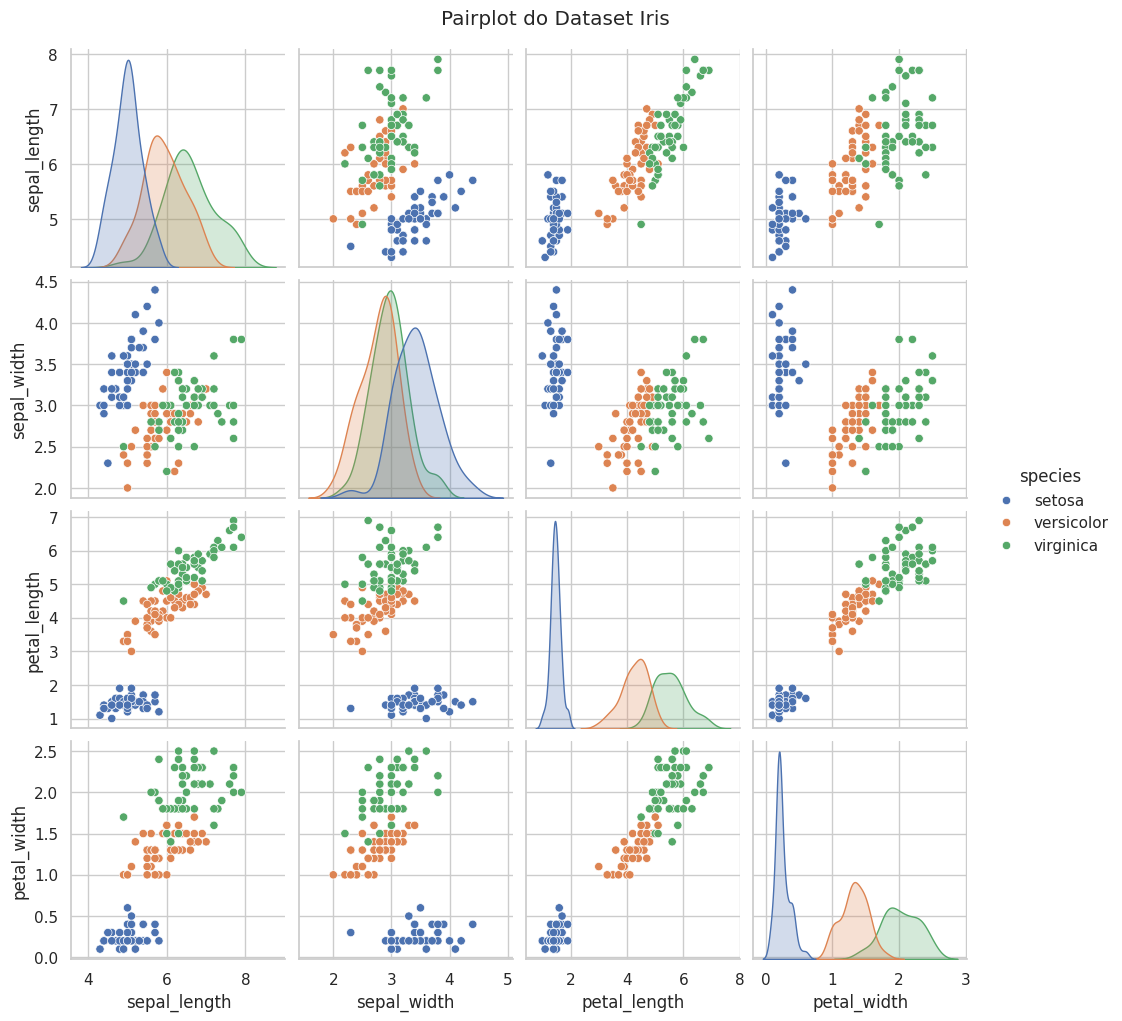

In [47]:
# Usar o dataset iris
iris = sns.load_dataset('iris')

# Pairplot
sns.pairplot(iris, hue='species', height=2.5)
plt.suptitle('Pairplot do Dataset Iris', y=1.02)
plt.show()

O heatmap, ou mapa de calor, é uma representação gráfica de dados onde os valores individuais contidos em uma matriz são representados como cores. Essa visualização é particularmente útil para identificar padrões, correlações e variações em grandes conjuntos de dados. No contexto do Seaborn, o heatmap é frequentemente usado para visualizar matrizes de correlação, matrizes de confusão ou qualquer outra tabela de dados onde a magnitude dos valores é importante. A intensidade da cor geralmente corresponde à magnitude do valor, permitindo que o usuário identifique rapidamente os valores mais altos e mais baixos.

Além de sua capacidade de destacar padrões, o heatmap do Seaborn oferece diversas opções de personalização para melhorar a clareza e a interpretação. É possível ajustar a paleta de cores para enfatizar diferentes aspectos dos dados, adicionar anotações para exibir os valores numéricos em cada célula e controlar a ordem das linhas e colunas para agrupar valores semelhantes. Essas opções tornam o heatmap uma ferramenta versátil para a análise exploratória de dados e a comunicação de insights complexos de forma visualmente intuitiva.


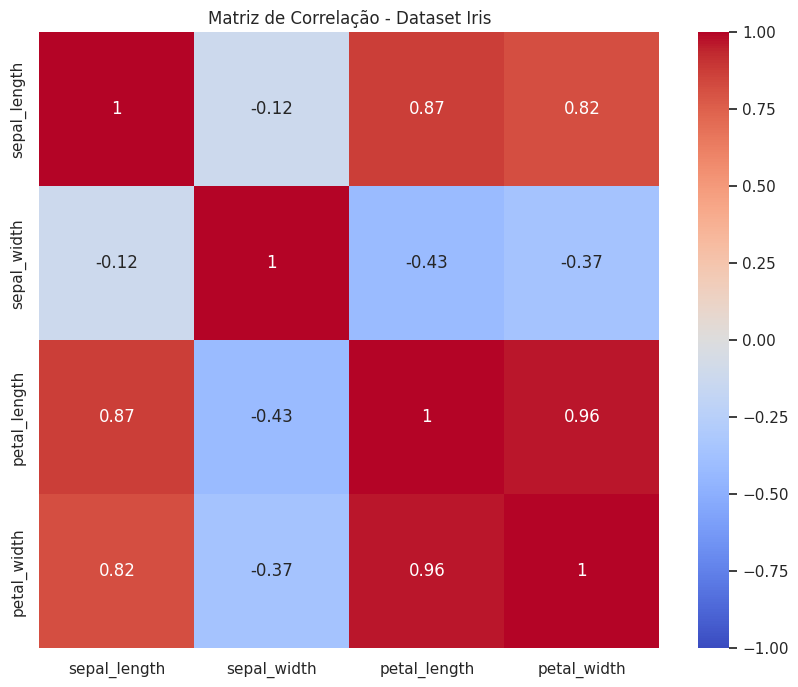

In [48]:
# Matriz de correlação
corr = iris.drop('species', axis=1).corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Dataset Iris')
plt.show()

O **clustermap** do Seaborn é uma poderosa ferramenta de visualização que combina um mapa de calor com dendrogramas de agrupamento hierárquico nas margens. Esta visualização não apenas mostra a intensidade dos valores através de cores, como um heatmap tradicional, mas também reorganiza automaticamente as linhas e colunas com base na similaridade dos dados. Os dendrogramas nas bordas do gráfico ilustram como os grupos são formados, com a altura das linhas indicando a distância ou dissimilaridade entre os clusters. Esta característica torna o **clustermap** particularmente útil para identificar padrões ocultos, subgrupos e relações hierárquicas em conjuntos de dados complexos.

O **clustermap** oferece diversas opções de personalização que aumentam sua utilidade analítica. É possível padronizar os dados por linhas ou colunas para facilitar comparações, escolher diferentes métodos de ligação para o agrupamento hierárquico (como "*ward*", "*complete*" ou "*average*"), e selecionar métricas de distância apropriadas para diferentes tipos de dados. Além disso, o **clustermap** permite a adição de anotações, ajuste de paletas de cores e personalização dos dendrogramas. Estas características fazem do **clustermap** uma ferramenta essencial para análise exploratória em diversos campos, como genômica, análise de mercado financeiro, ou qualquer área onde a identificação de estruturas naturais nos dados seja importante.

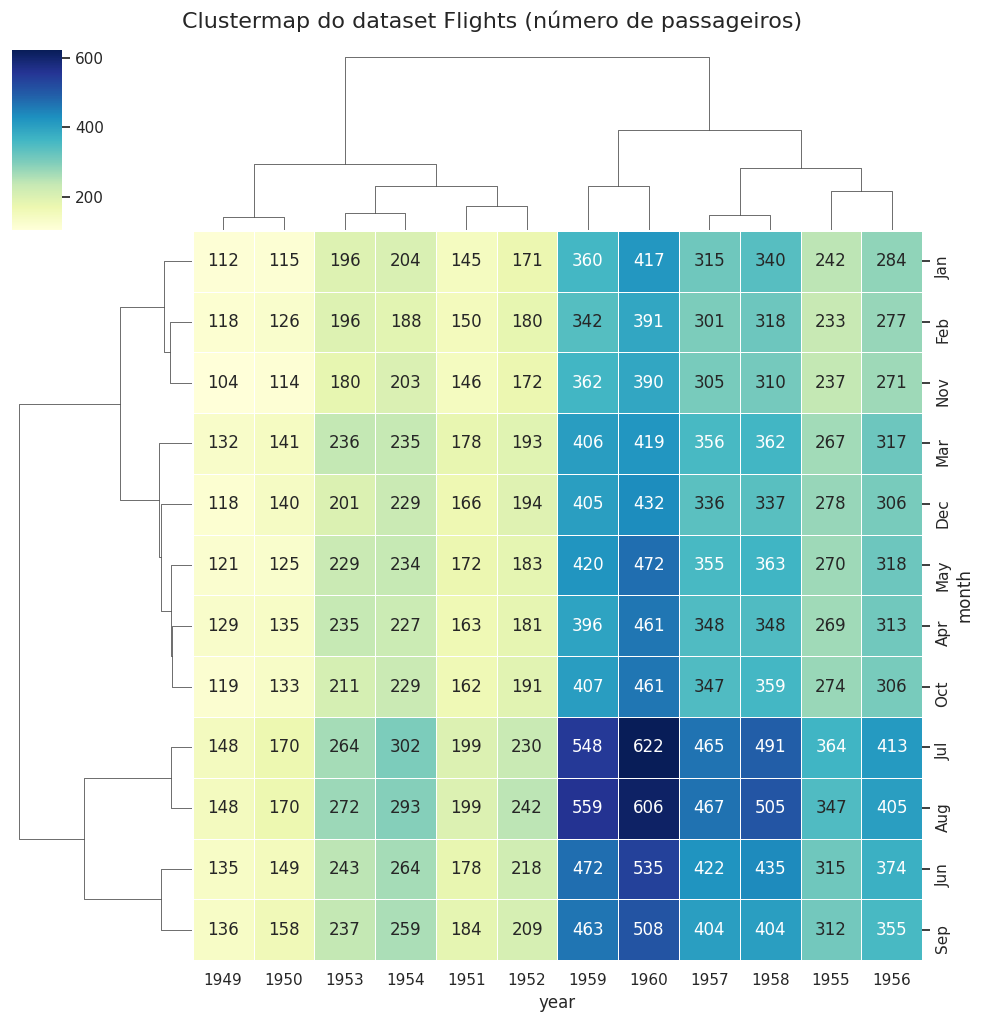

In [52]:
# Carregar o dataset flights
df_flights = sns.load_dataset('flights')

# Transformar o DataFrame para formato de matriz (pivot)
flights_pivot = df_flights.pivot(index='month', columns='year', values='passengers')

# Criar o clustermap
sns.clustermap(flights_pivot, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
plt.suptitle("Clustermap do dataset Flights (número de passageiros)", fontsize=16, y=1.02)
plt.show()

O **JointGrid** do Seaborn é uma classe que permite criar gráficos compostos, combinando um gráfico bivariado central com gráficos univariados nas margens. Essa estrutura é ideal para visualizar a relação entre duas variáveis, ao mesmo tempo em que se observa a distribuição individual de cada uma delas. O gráfico central pode ser um scatter plot, um gráfico de densidade, um hexbin plot ou qualquer outra visualização bivariada, enquanto os gráficos marginais geralmente são histogramas ou KDE plots. Essa combinação oferece uma visão completa dos dados, facilitando a identificação de padrões, correlações e características individuais das variáveis.

A flexibilidade do **JointGrid** permite personalizar cada componente do gráfico de forma independente. É possível escolher diferentes tipos de gráficos para o centro e as margens, ajustar as cores e estilos, adicionar anotações e muito mais. Além disso, o **JointGrid** oferece a capacidade de integrar funções estatísticas, como a regressão linear, diretamente na visualização. Essa combinação de recursos torna o **JointGrid** uma ferramenta poderosa para a análise exploratória de dados, permitindo uma compreensão mais profunda das relações entre variáveis e suas distribuições individuais.

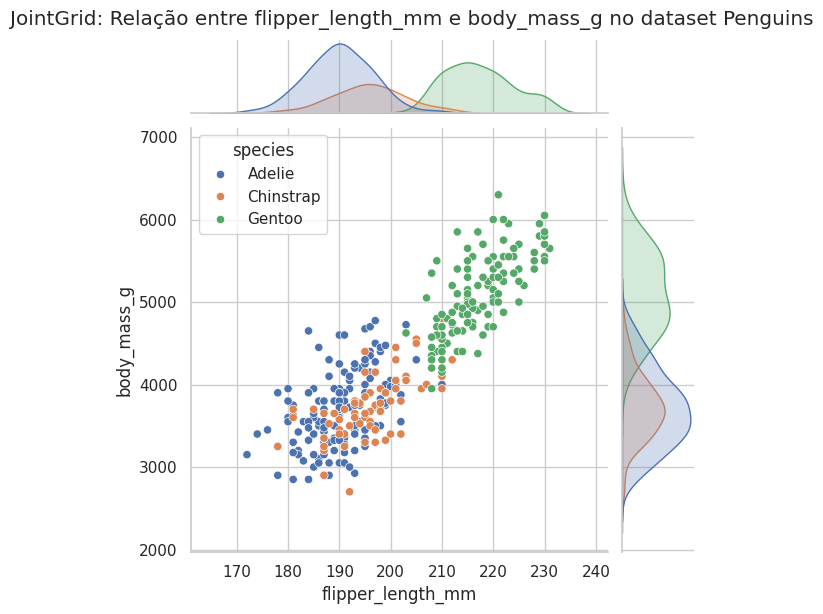

In [54]:
# Carregar o dataset penguins
penguins = sns.load_dataset('penguins')

# Remover linhas com valores nulos
penguins = penguins.dropna()

# Criar o JointGrid
g = sns.JointGrid(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species")

# Adicionar scatter plot no centro e KDE plots nas margens
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot, fill=True)

# Adicionar título
g.fig.suptitle("JointGrid: Relação entre flipper_length_mm e body_mass_g no dataset Penguins", y=1.02)

plt.show()

### 4.3.6 FacetGrid: Múltiplos Gráficos por Categoria

FacetGrid permite criar múltiplos gráficos separados por categorias:

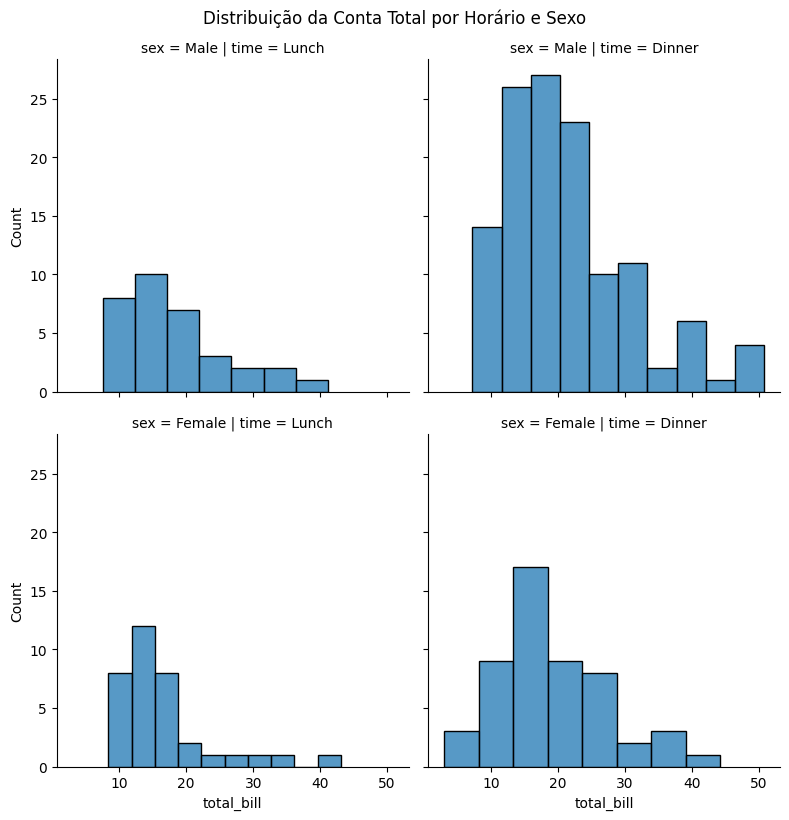

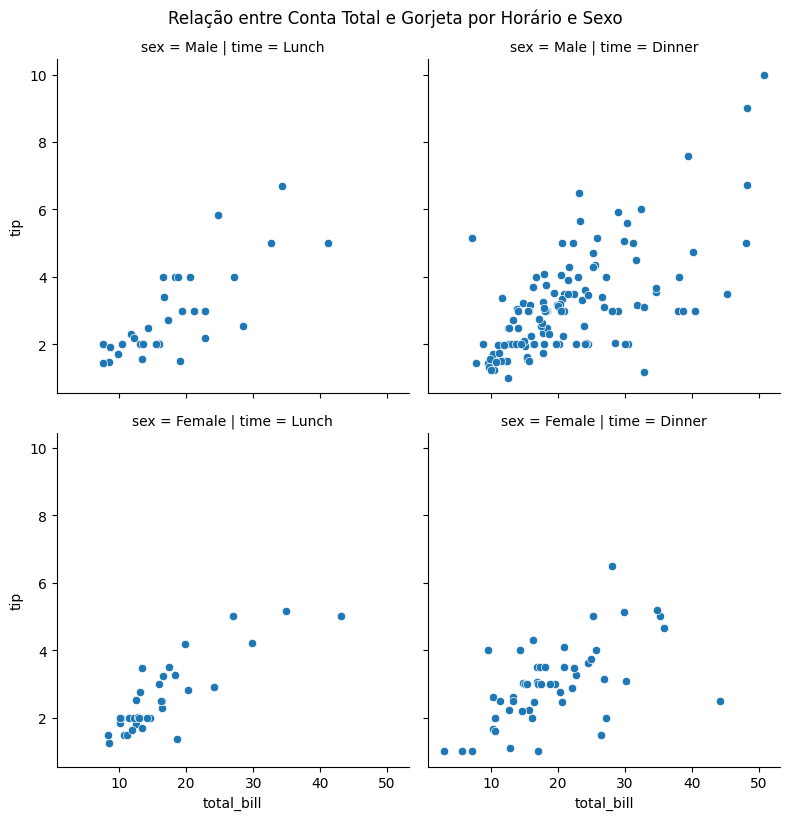

In [22]:
# FacetGrid com histogramas
g = sns.FacetGrid(tips, col="time", row="sex", height=4)
g.map(sns.histplot, "total_bill")
plt.suptitle('Distribuição da Conta Total por Horário e Sexo', y=1.02)
plt.show()

# FacetGrid com scatterplots
g = sns.FacetGrid(tips, col="time", row="sex", height=4)
g.map(sns.scatterplot, "total_bill", "tip")
plt.suptitle('Relação entre Conta Total e Gorjeta por Horário e Sexo', y=1.02)
plt.show()

### 4.3.7 Personalização de Gráficos no Seaborn

Seaborn permite personalizar gráficos de várias maneiras:

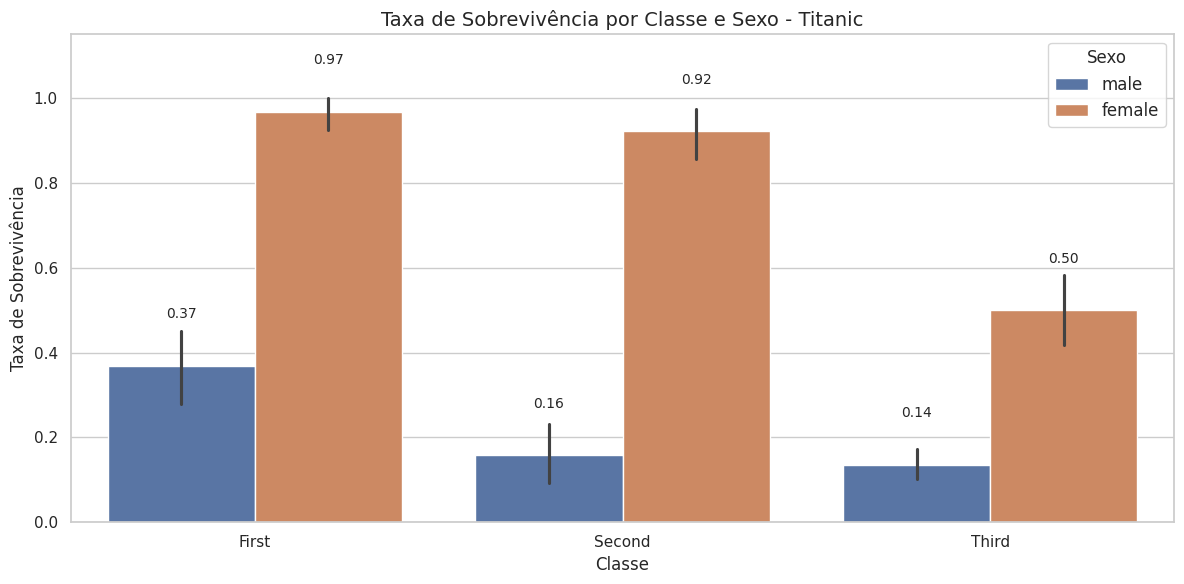

In [46]:
# Configurar o estilo
sns.set_theme(style="whitegrid", palette="deep", font_scale=1)

# Criar um gráfico personalizado
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='class', y='survived', hue='sex', errorbar=('ci', 95), data=titanic)

# Dimensionar o gráfico no eixo y
ax.set_ylim(0, 1.15)  # Define o limite superior do eixo y para 1.15

# Personalizar o gráfico
ax.set_title('Taxa de Sobrevivência por Classe e Sexo - Titanic', fontsize=14)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylabel('Taxa de Sobrevivência', fontsize=12)
ax.legend(title='Sexo', fontsize=12, title_fontsize=12)

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=32, fontsize=10)

plt.tight_layout()
plt.show()

## 4.4 Conclusão

Seaborn é uma poderosa biblioteca de visualização que simplifica a criação de gráficos estatísticos atraentes. Ela se baseia no Matplotlib, mas oferece uma interface mais amigável e resultados visualmente mais agradáveis por padrão.

Nos próximos capítulos, exploraremos os conjuntos de dados embutidos no Seaborn e como aplicar diferentes tipos de gráficos para análise de dados demográficos.